# Training a CNN Classifier to Solve Prediction Problem w/ CIFAR10 Dataset
**Required Packages** PyTorch, Torchvision
  
  Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.
  
-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful
  
Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.
  
We will do the following steps in order:
  
1. Load and normalizing the CIFAR10 training and test datasets using ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

In [2]:
#### Install PyTorch
!pip install torch torchvision

    100% |████████████████████████████████| 519.5MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x55d995df4000 @  0x7f83a4dae2a4 0x55d93c6a8b68 0x55d93c79492d 0x55d93c6bc01a 0x55d93c6c0d72 0x55d93c6b98ca 0x55d93c6c124e 0x55d93c6b98ca 0x55d93c6c124e 0x55d93c6b98ca 0x55d93c6c124e 0x55d93c6b98ca 0x55d93c6c17d3 0x55d93c6b98ca 0x55d93c6c124e 0x55d93c6b98ca 0x55d93c6c124e 0x55d93c6c0d72 0x55d93c6c0d72 0x55d93c6b98ca 0x55d93c6c17d3 0x55d93c6c0d72 0x55d93c6b98ca 0x55d93c6c17d3 0x55d93c6b98ca 0x55d93c6c17d3 0x55d93c6b98ca 0x55d93c6c124e 0x55d93c6b98ca 0x55d93c6b91e9 0x55d93c6e9bdf
    100% |████████████████████████████████| 61kB 22.0MB/s 
  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', error(104, 'Connection reset by peer'))': /simple/pillow/
    100% |████████████████████████████████| 2.0MB 2.5MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully

# 1: Loading and Normalising CIFAR10

In [0]:
#### Loading and Normalising CIFAR10
# Use torchvision to load CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
#### Download CIFAR10 Dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified


In [0]:
#### Load the Dataset
# Shuffle loading process of training dataset to make the learning process independant of data order.
# Do not shuffle loading process of test dataset to evaluate if system can handle unspecified bias order of inputs.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [0]:
#### Classes used in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  cat  bird  ship  bird


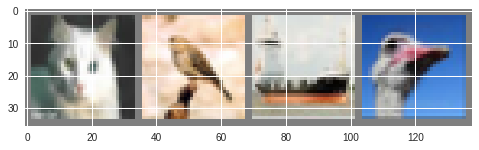

In [7]:
#### Show Images in Dataset
import matplotlib.pyplot as plt
import numpy as np
# Define Function to Show Image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
# Declare to Pull Random Image
dataiter = iter(trainloader)
images, labels = dataiter.next()
# Declare to Show Image
imshow(torchvision.utils.make_grid(images))
# Print Labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 2: Define a Convolution Neural Network

In [0]:
#### Import PyTorch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
#### Initialize Hyper-Parameters
# Not Used in this case

In [0]:
#### Build Convolution Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [0]:
#### Instantiate FNN
# create a real CNN based on our structure.
net = Net()

In [0]:
#### Enable GPU
# Use to run code on GPU
use_cuda = True
if use_cuda and torch.cuda.is_available():
    net.cuda()

# 3: Define a Loss Function and Optimizer

In [0]:
#### Import PyTorch
import torch.optim as optim

In [0]:
#### Choose Loss Function and Optimizer
#Loss function (criterion) decides how the output can be compared to a class, which determines how good or bad the neural network performs.
#The optimizer chooses a way to update the weight in order to converge to find the best weights in this neural network.
#In this case, we use a Classification Cross-Entropy loss and SGD with momentum.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 4: Train the Network

In [15]:
#### Train the CNN Model
# We loop over our data iterator, and feed the inputs to the network and optimize.
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):   # Load a batch of images with its (index, data, class)
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()                   # Intialize the hidden weight to all zeros

        # forward + backward + optimize
        outputs = net(inputs)                   # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)       # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                         # Backward pass: compute the weight
        optimizer.step()                        # Optimizer: update the weights of hidden nodes

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.223
[1,  4000] loss: 1.959
[1,  6000] loss: 1.735
[1,  8000] loss: 1.613
[1, 10000] loss: 1.512
[1, 12000] loss: 1.466
[2,  2000] loss: 1.403
[2,  4000] loss: 1.378
[2,  6000] loss: 1.360
[2,  8000] loss: 1.320
[2, 10000] loss: 1.303
[2, 12000] loss: 1.291
Finished Training


# 5: Test the Network on Test Data

('GroundTruth: ', '  cat  ship  ship plane')
('Predicted: ', '  cat   car   car  ship')


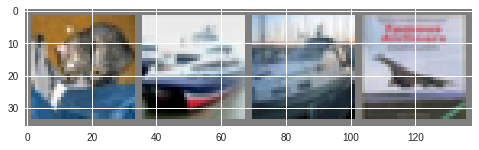

In [16]:
#### Display an image from the test set to get familiar.
# Trained network for 2 passes over the training dataset.
# Need to check if the network has learnt anything at all.
#
# Check this by predicting the class label that the neural network
# outputs, and checking it against the ground-truth. If the prediction is
# correct, we add the sample to the list of correct predictions.
dataiter = iter(testloader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
# Okay, now let us see what the neural network thinks these examples above are:
outputs = net(images)
# The outputs are energies for the 10 classes.
# Higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [17]:
#### Test the FNN Model
# Look at how the network performs on the whole dataset.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)        # Choose the best class from the output: The class with the best score
        total += labels.size(0)                          # Increment the total count
        correct += (predicted == labels).sum().item()    # Increment the correct count

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [18]:
#### Identify the classes of data that performed well and those that did not perform well
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 67 %
Accuracy of   car : 73 %
Accuracy of  bird : 40 %
Accuracy of   cat : 31 %
Accuracy of  deer : 56 %
Accuracy of   dog : 44 %
Accuracy of  frog : 42 %
Accuracy of horse : 66 %
Accuracy of  ship : 64 %
Accuracy of truck : 56 %


# 6: Training Network on GPU

In [19]:
#### Training on GPU
# Just like how you transfer a Tensor on to the GPU, you transfer the neural
# net onto the GPU.
#
# Let's first define our device as the first visible cuda device if we have
# CUDA available:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

# The rest of this section assumes that `device` is a CUDA device.
#
# Then these methods will recursively go over all modules and convert their
# parameters and buffers to CUDA tensors:
#
# .. code:: python
#
#     net.to(device)
#
#
# Remember that you will have to send the inputs and targets at every step
# to the GPU too:
#
# .. code:: python
#
#         inputs, labels = inputs.to(device), labels.to(device)
#
# Why dont I notice MASSIVE speedup compared to CPU? Because your network
# is realllly small.

cpu


# Additional Practice

In [0]:
# **Exercise:** Try increasing the width of your network (argument 2 of
# the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
# they need to be the same number), see what kind of speedup you get.
#
# **Goals achieved**:
#
# - Understanding PyTorch's Tensor library and neural networks at a high level.
# - Train a small neural network to classify images
#
# Training on multiple GPUs
# -------------------------
# If you want to see even more MASSIVE speedup using all of your GPUs,
# please check out :doc:`data_parallel_tutorial`.
#
# Where do I go next?
# -------------------
#
# -  :doc:`Train neural nets to play video games </intermediate/reinforcement_q_learning>`
# -  `Train a state-of-the-art ResNet network on imagenet`_
# -  `Train a face generator using Generative Adversarial Networks`_
# -  `Train a word-level language model using Recurrent LSTM networks`_
# -  `More examples`_
# -  `More tutorials`_
# -  `Discuss PyTorch on the Forums`_
# -  `Chat with other users on Slack`_
#
# .. _Train a state-of-the-art ResNet network on imagenet: https://github.com/pytorch/examples/tree/master/imagenet
# .. _Train a face generator using Generative Adversarial Networks: https://github.com/pytorch/examples/tree/master/dcgan
# .. _Train a word-level language model using Recurrent LSTM networks: https://github.com/pytorch/examples/tree/master/word_language_model
# .. _More examples: https://github.com/pytorch/examples
# .. _More tutorials: https://github.com/pytorch/tutorials
# .. _Discuss PyTorch on the Forums: https://discuss.pytorch.org/
# .. _Chat with other users on Slack: http://pytorch.slack.com/messages/beginner/